In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import skew, kurtosis

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [3]:
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


((344, 7), None)

In [4]:
df.columns.values

array(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'], dtype=object)

In [5]:
df1 = df.copy()

In [6]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,337.000000,342.000000,342.000000,342.000000
mean,43.876855,17.151170,200.915205,4273.976608
std,5.478600,1.974793,14.061714,1119.229602
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.100000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,15000.000000


In [7]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [8]:
df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [9]:
df.isna().sum() / df.shape[0] * 100

species              0.000000
island               0.000000
bill_length_mm       2.034884
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  4.651163
dtype: float64

### Data Cleaning

 ### 1) Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it.

In [10]:
#  count the number of missing values in each column.
df.isna().sum()

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

In [11]:
# umber of missing values is small, remove rows with missing values
df = df.dropna()
df.isna().sum()
df.shape

(323, 7)

In [12]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Identify Missing Data:

* df.isna().sum() counts the number of missing values in each column.
* df.shape returns the dimensions of the dataset.
## Handle Missing Data:

* Option 1: Remove rows with missing values using df.dropna(). This is suitable if the number of missing values is small.

* Option 2: Fill missing values using fillna(). For numerical columns, fill with the mean. For categorical columns, fill with the mode.
Verify Cleaning:

Check for missing values again using df.isna().sum().
Get the shape of the cleaned dataset using df.shape.

### 2) What is the average body_mass_g for Gentoo penguins?

In [13]:
avg_bm_g = df[df['species'] == 'Gentoo']
avg_bm_g = avg_bm_g['body_mass_g'].mean()
print(f"The average body_mass_g for Gentoo penguins is: {avg_bm_g:.2f} grams.")

The average body_mass_g for Gentoo penguins is: 5159.15 grams.


### 3) How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species.

In [14]:
df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

 #### Skewness and kurtosis

* `Skewness`: This measures the asymmetry of the distribution. A positive skew means the tail on the right side is longer, while a negative skew indicates a longer left tail.

* `kurtosis`: This measures the "tailedness" of the distribution. High kurtosis indicates heavy tails, while low kurtosis points to light tails.

In [15]:
df = df.dropna()
df.isna().sum()
df.shape

(323, 7)

In [16]:
group_species = df.groupby('species')

skewness = group_species[['bill_length_mm', 'bill_depth_mm']].apply(lambda x: skew(x, nan_policy='omit'))
skewness

species
Adelie       [0.14785553055324596, 0.30496283856083595]
Chinstrap     [-0.08954611496766, 0.002885936248547447]
Gentoo        [0.6423463223988263, 0.32456214621312685]
Name: (bill_length_mm, bill_depth_mm), dtype: object

In [17]:
kurtosis = group_species[['bill_length_mm', 'bill_depth_mm']].apply(lambda x: kurtosis(x, nan_policy='omit'))
kurtosis

species
Adelie       [-0.1467776352724548, -0.09234177872151461]
Chinstrap    [-0.03177243746594938, -0.9011113930000443]
Gentoo          [1.161794056130394, -0.5867590922827879]
Name: (bill_length_mm, bill_depth_mm), dtype: object

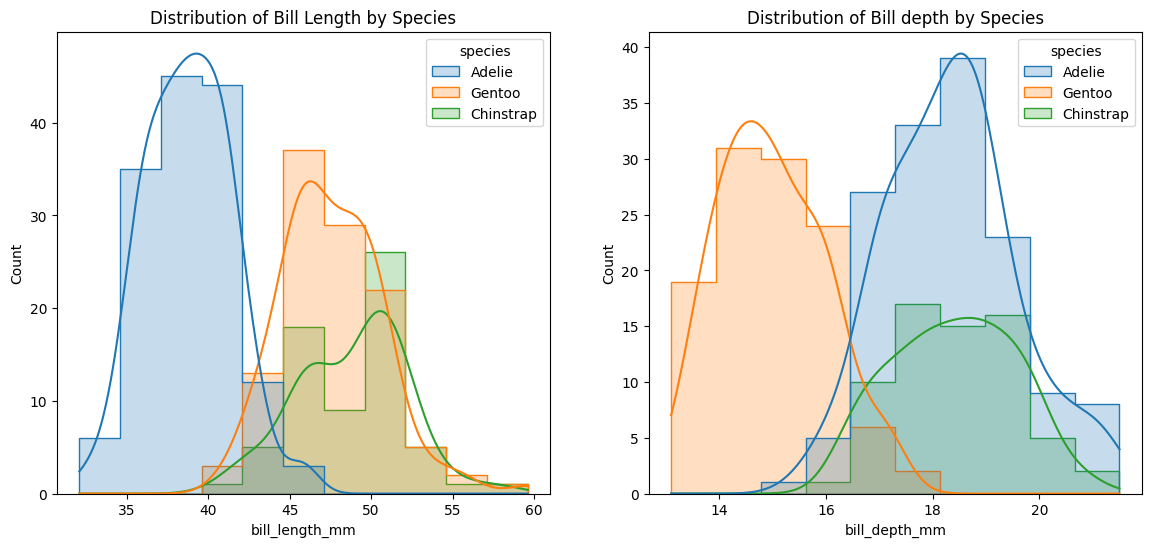

In [18]:
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.histplot(data=df,x='bill_length_mm',hue='species',kde=True,element='step')
plt.title('Distribution of Bill Length by Species')

plt.subplot(1,2,2)
sns.histplot(data=df,x='bill_depth_mm',hue='species',kde=True,element='step')
plt.title('Distribution of Bill depth by Species')
plt.show()

### **Explanation**

* `Bill Length`

    * Adelie: Slightly negatively skewed (tail on left),with the peak around 40 mm.Most penguins have shorter bills, and a small number have longer ones.
    
    * Gentoo: Positively skewed (tail on right),with a peak around 48 mm. There are more penguins with shorter bills, but a significant right tail indicates some with much longer bills.

    * Chinstrap: Slightly negatively skewed (tail on left),with a peak around 50 mm.

* `Bill Depth`

    * Adelie: Slight negative skew, close to symmetric,with a peak around 18 mm.

    * Gentoo: Positively skewed (tail on right),with a peak around 14.5 mm.Most penguins have smaller bill depths, but a few have larger ones.

    * Chinstrap: Mostly symmetric,centered around 18 mm..



### 4) Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers.

In [19]:
def outliers(df,features):
    outliers = {}
    for f in features:
        q1 = df[f].quantile(0.25)
        q3 = df[f].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5 * iqr
        ub = q3 + 1.5 * iqr
        outliers[f] = df[(df[f] < lb) | (df[f] > ub)].shape[0]
    return outliers

features = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g']
outliers = outliers(df,features)

for feature,data in outliers.items():
    print(f"Outliers in {feature} : {data}")

Outliers in bill_length_mm : 0
Outliers in bill_depth_mm : 0
Outliers in flipper_length_mm : 0
Outliers in body_mass_g : 3


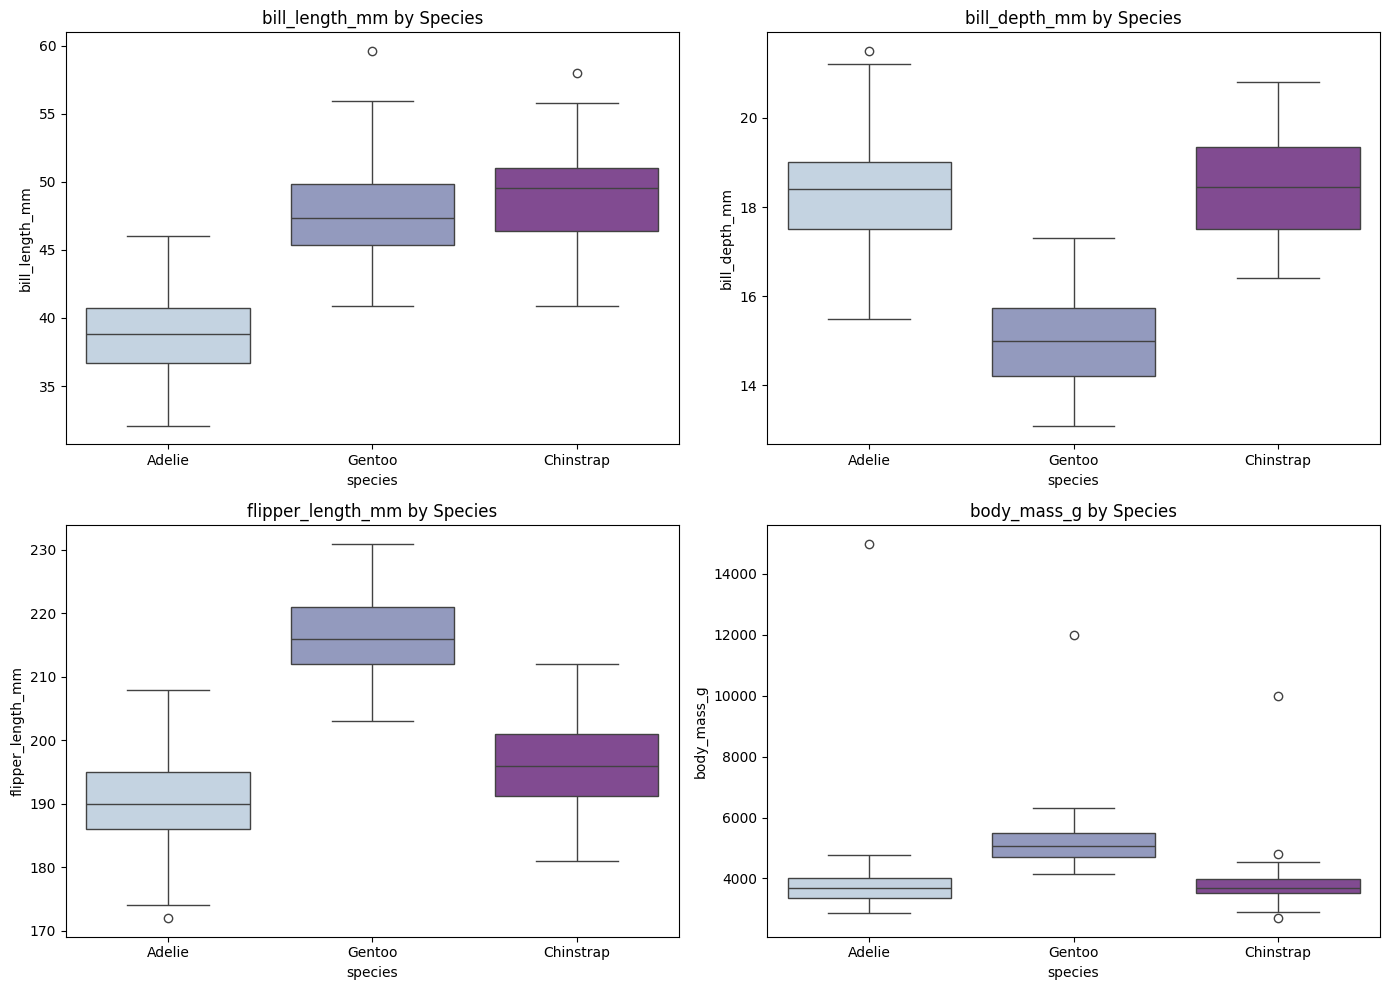

In [20]:
palette = sns.color_palette("BuPu", len(df['species'].unique()))
plt.figure(figsize=(14, 10))

for i, f in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='species', y=f, palette=palette)
    plt.title(f'{f} by Species')

plt.tight_layout()
plt.show()

### **Explanation**

Method: **IQR**-Interquartile range

* Gentoo and Chinstrap have more outliers in bill length.

* Adelie has outliers in bill depth and flipper length.

* Body mass has outliers across all species, with Gentoo showing extreme values.



#### 5) Does this dataset contribute to the curse of dimensionality? If yes perform PCA. 

* If your dataset has a large number of features (dimensions), it can lead to issues such as overfitting, increased computational cost, and difficulty in visualizing the data.


* if the dataset suffers from the curse of dimensionality, we should consider the number of features relative to the number of samples.

In [21]:
## By the dataset we can say it is not high dimensional , anyway it useful for understanding variance of each feature

features = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g']
x = df[features].dropna()

In [22]:
## Standardize the data

x_mean = np.mean(x,axis=0)
x_std = np.std(x,axis=0)
x_std = (x-x_mean)/x_std

In [23]:
## Covariance matrix

cov_matrix = np.cov(x_std.T)

In [24]:
## compute eigenvalues and eigenvectors
e_val,e_vec = np.linalg.eig(cov_matrix)

In [25]:
## sort the eigenvalues in  order

sort_indices = np.argsort(e_val)[::-1]
e_val = e_val[sort_indices] 
e_vec = e_vec[:,sort_indices]

In [26]:
## compute the explained variance

n_components = 2
projection_matrix = e_vec[:, :n_components]
x_pca = np.dot(x_std, projection_matrix)

In [27]:
pca_df = pd.DataFrame(data = x_pca, columns = ['PC1', 'PC2'])

In [28]:
pca_df = pd.concat([pca_df,df[['species']].reset_index(drop=True)], axis=1)

In [29]:
## explained variance ratio

explained_variance_ratio = e_val / np.sum(e_val)
for i,r in enumerate(explained_variance_ratio):
    print(f"Explained Variance for PC{i+1} : {r}")

Explained Variance for PC1 : 0.6155723397816167
Explained Variance for PC2 : 0.19748104168972155
Explained Variance for PC3 : 0.13393102153210498
Explained Variance for PC4 : 0.05301559699655669


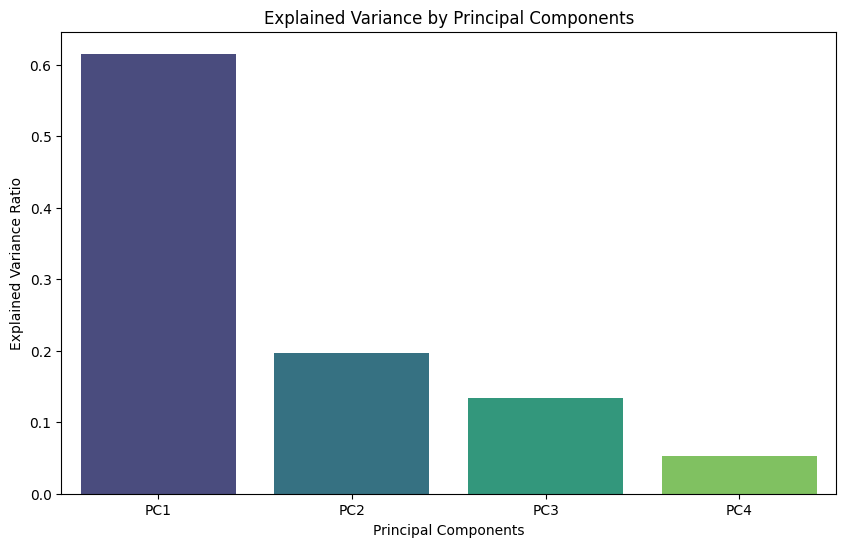

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, len(explained_variance_ratio) + 1), y=explained_variance_ratio, palette='viridis')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.xticks(ticks=np.arange(0, len(explained_variance_ratio)), labels=[f'PC{i+1}' for i in range(len(explained_variance_ratio))])
plt.show()

### **Explanation**

* `Explained Variance:`

    - PC1 explains 61.6% of the variance.
    - PC2 explains 19.7%.
    - PC3 explains 13.4%.
    - PC4 explains 5.3%.

    - TOTAL = 81.3% variance i.e. reduce to 2-Dim without loss of data.

    reduced 4 features to 2 features for better results for further analysis

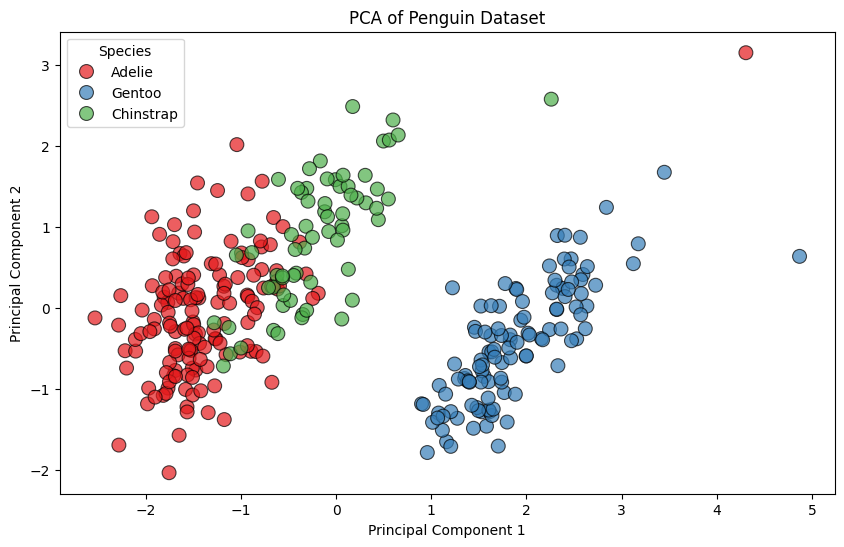

In [31]:
## PCA result visual

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='Set1', s=100, alpha=0.7, edgecolor='k')
plt.title('PCA of Penguin Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

### **Explanation**

* `PCA Result:`

* features - {bill length, bill depth, flipper length, and body mass}

    - Gentoo penguins are clearly separated from the others.
    - Adelie and Chinstrap overlap a bit but are still somewhat distinguishable.

* PCA reduced the dataset from four features to two main components:

    - PC1=61.6% of data's variation.
    - PC2=19.7% of data's variation.

* `Conclusion`:
    By this we can say  most of the important information is captured , making data easier to understand without lossing  much information.

### 6) Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them.

In [32]:
x = df['bill_length_mm']
y = df['bill_depth_mm']

* **Pairplot**

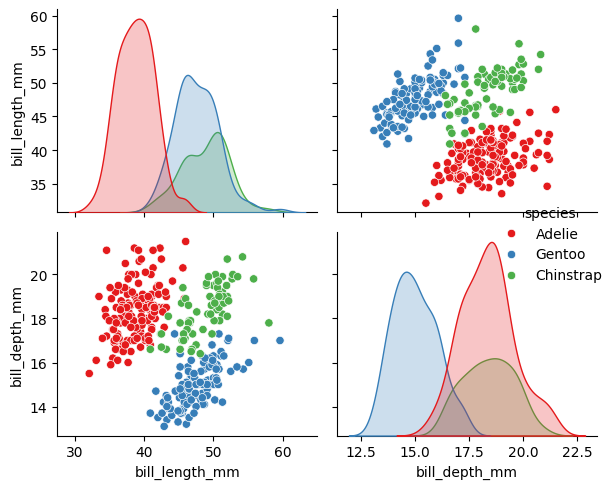

In [33]:
sns.pairplot(df, hue='species', vars=['bill_length_mm', 'bill_depth_mm'], palette='Set1')
plt.tight_layout()
plt.show()


* **Scatter plot**

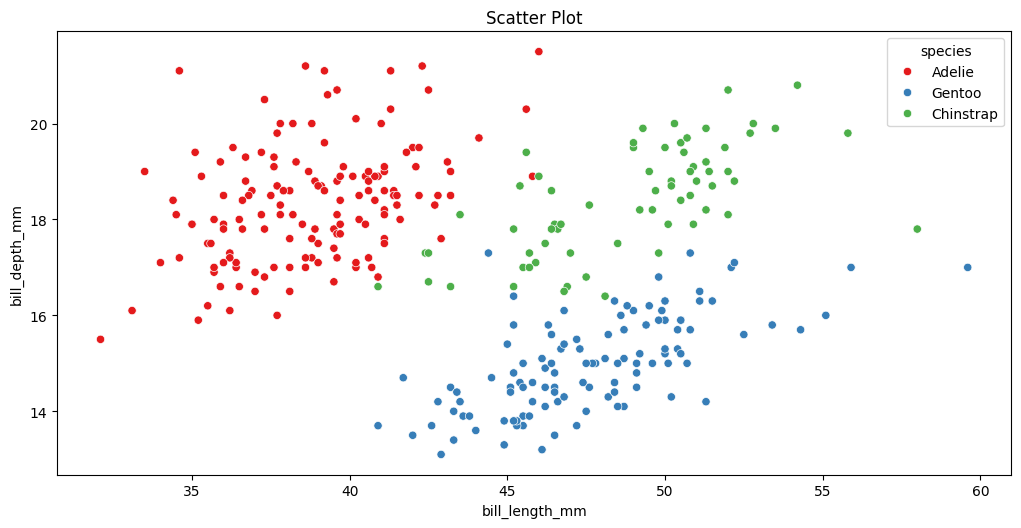

In [34]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 1)
sns.scatterplot(data=df, x=x, y=y, hue='species', palette='Set1')
plt.title('Scatter Plot')
plt.tight_layout()
plt.show()

* **Box Plot  (Bill Length vs Species)**

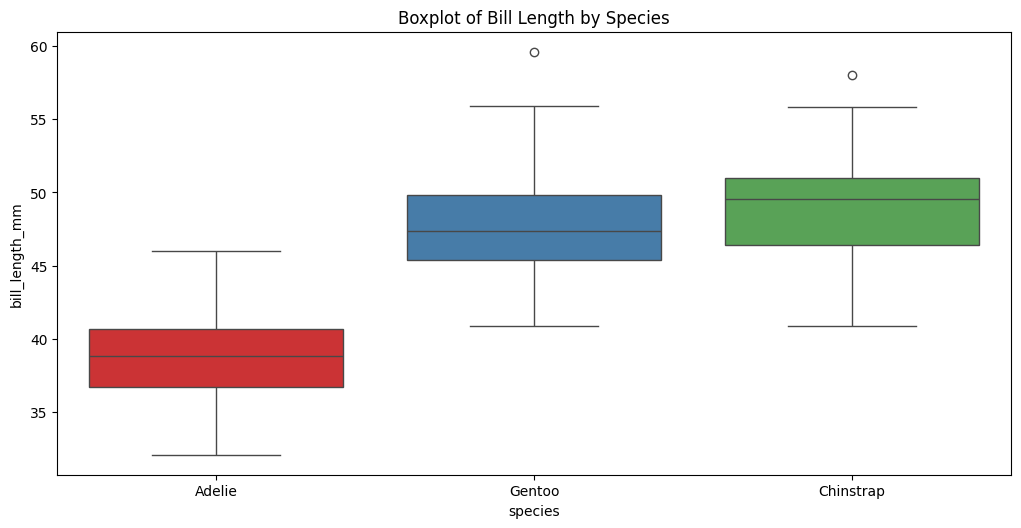

In [35]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 2)
sns.boxplot(data=df, x='species', y=x, palette='Set1')
plt.title('Boxplot of Bill Length by Species')
plt.tight_layout()
plt.show()

* **Box Plot  (Bill Depth vs Species)**

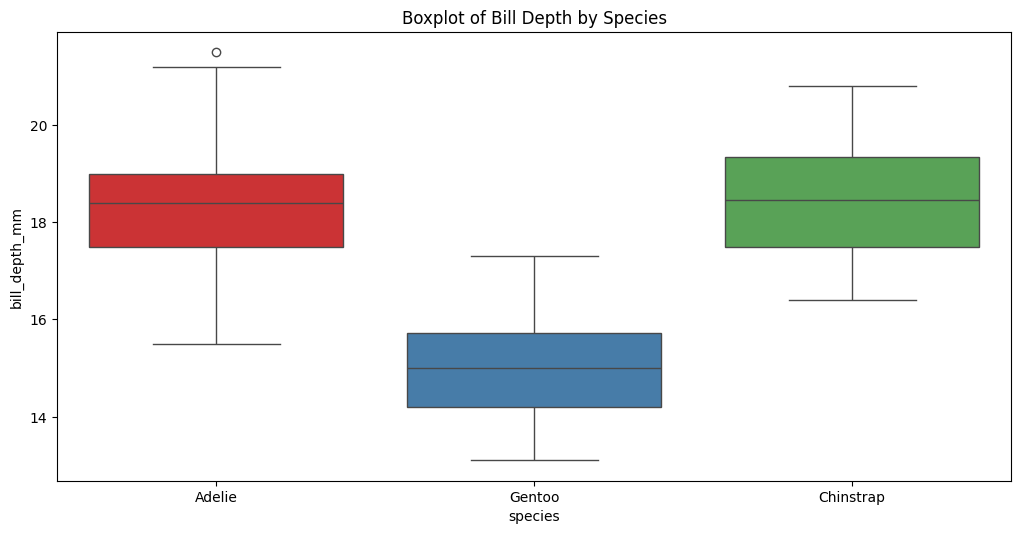

In [36]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 3)
sns.boxplot(data=df, x='species', y=y, palette='Set1')
plt.title('Boxplot of Bill Depth by Species')
plt.tight_layout()
plt.show()

* **line plot**

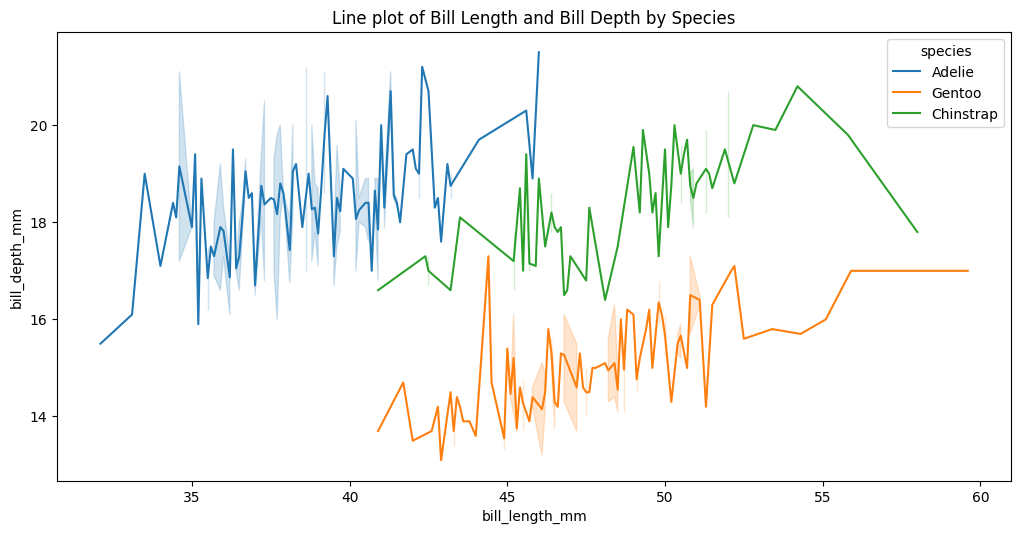

In [37]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 4)
sns.lineplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df)
plt.title('Line plot of Bill Length and Bill Depth by Species')
plt.tight_layout()
plt.show()

* **Violin Plot (Bill Length vs Species)**

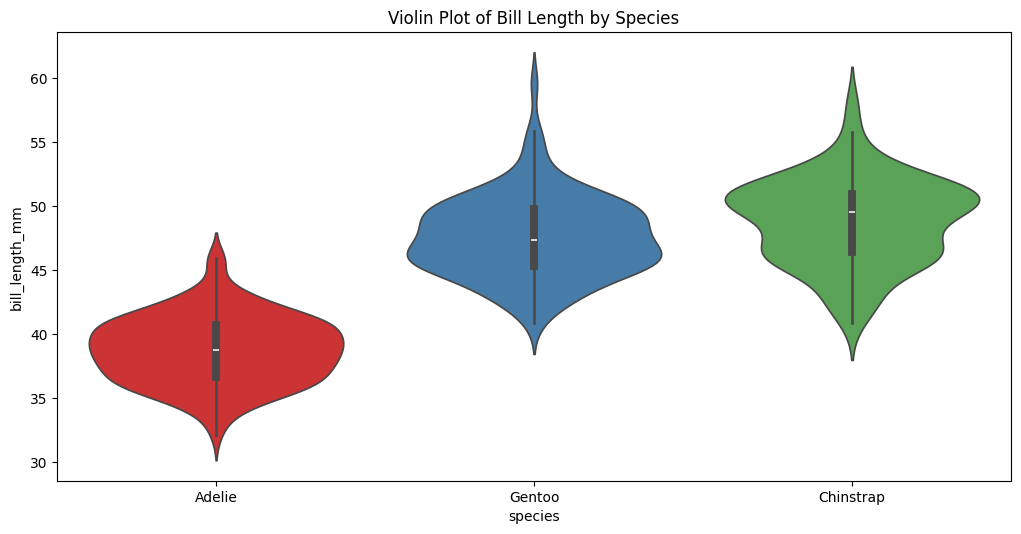

In [38]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 5)
sns.violinplot(data=df, x='species', y=x, palette='Set1')
plt.title('Violin Plot of Bill Length by Species')
plt.tight_layout()
plt.show()

* **Violin Plot (Bill Depth vs Species)**

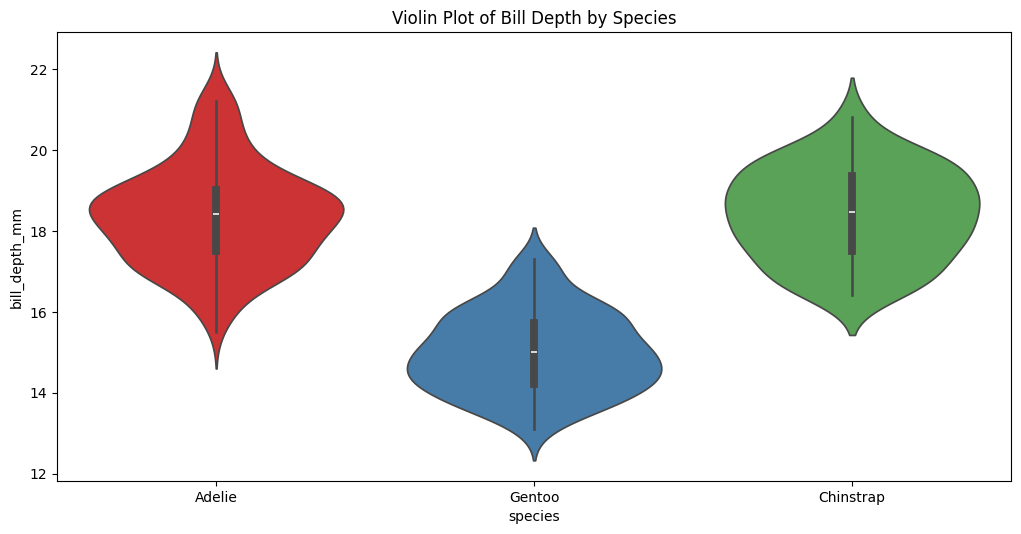

In [39]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 6)
sns.violinplot(data=df, x='species', y=y, palette='Set1')
plt.title('Violin Plot of Bill Depth by Species')
plt.tight_layout()
plt.show()

* **Histogram (Bill Length)**

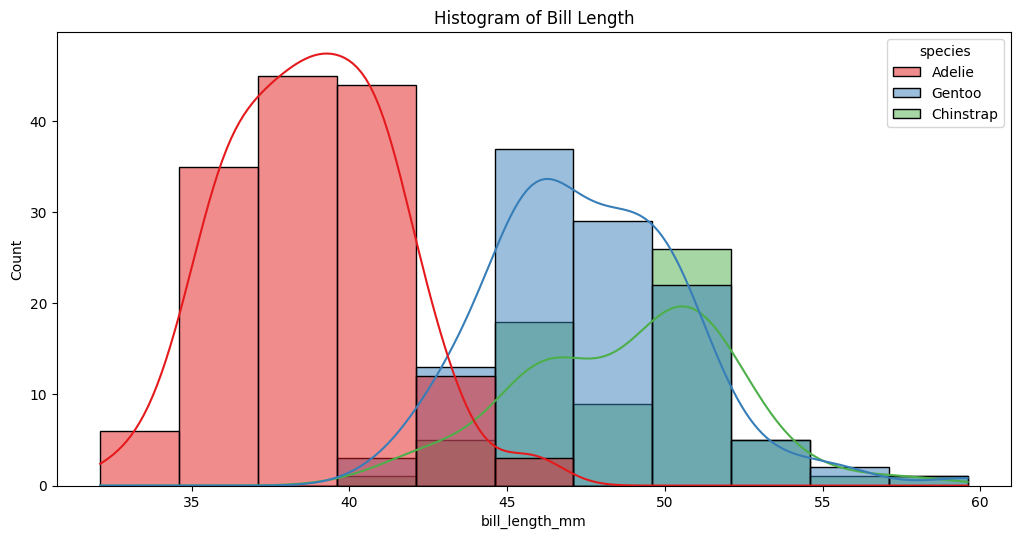

In [40]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 7)
sns.histplot(data=df, x=x, hue='species', kde=True, palette='Set1')
plt.title('Histogram of Bill Length')
plt.tight_layout()
plt.show()

* **Histogram (Bill Depth)**

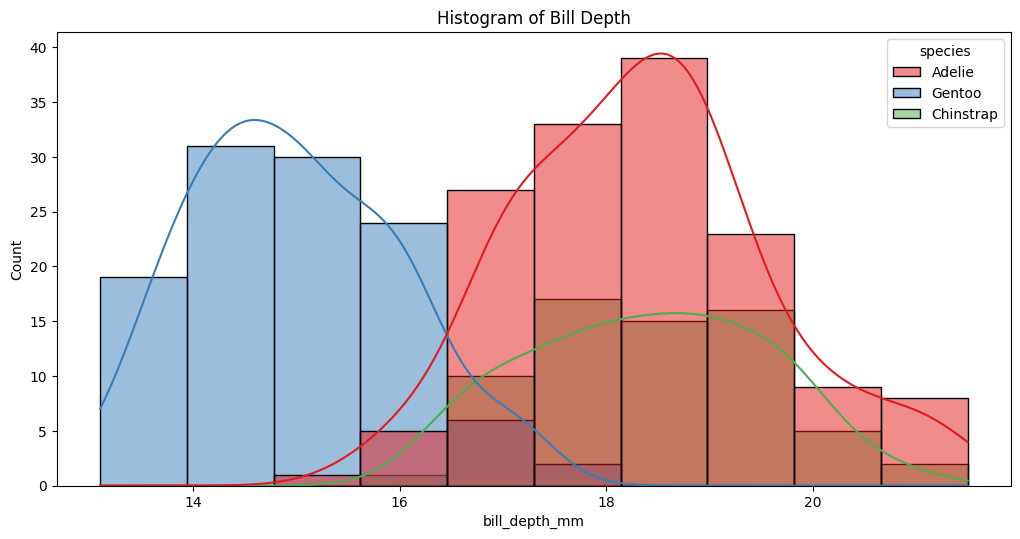

In [41]:
plt.figure(figsize=(20, 20))
plt.subplot(4,2,8)
sns.histplot(data=df, x=y, hue='species', kde=True, palette='Set1')
plt.title('Histogram of Bill Depth')
plt.tight_layout()
plt.show()

* **KDE plot**

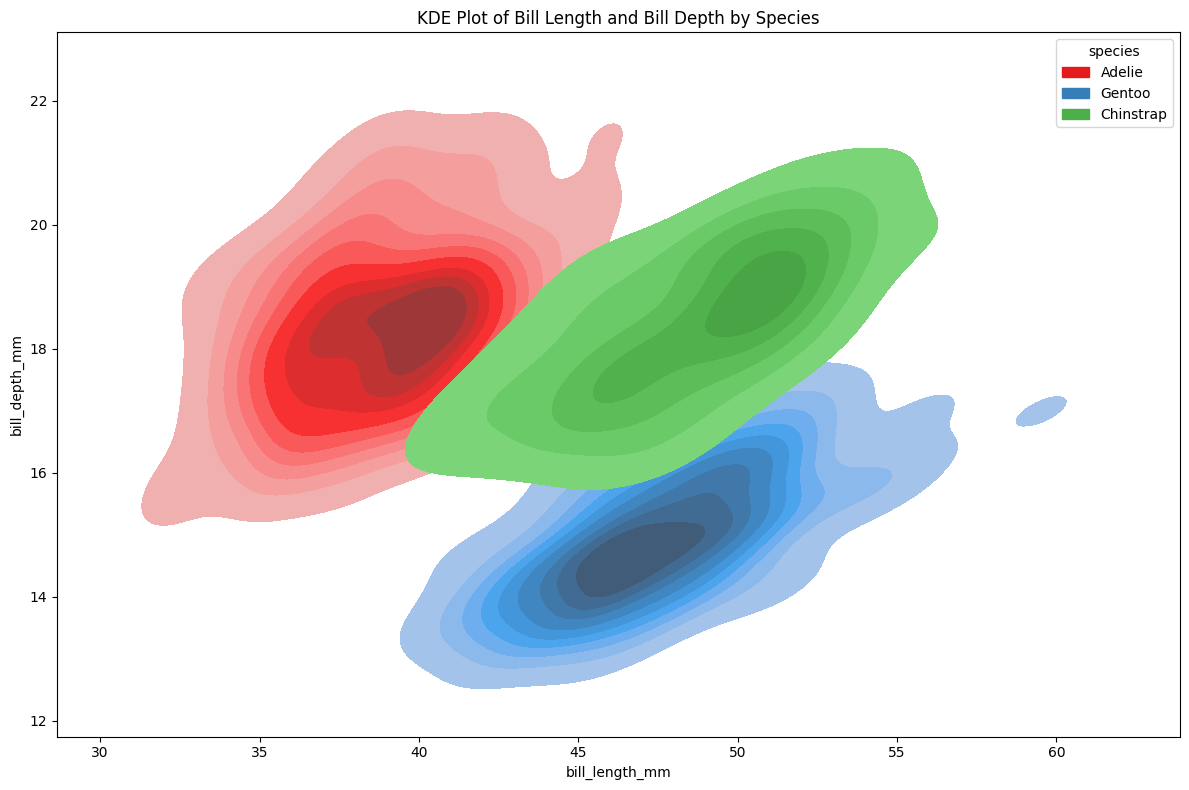

In [42]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x=x, y=y, hue='species', fill=True, palette='Set1')
plt.title('KDE Plot of Bill Length and Bill Depth by Species')
plt.tight_layout()
plt.show()

### 7) Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island?

In [43]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [44]:
island_species_group = df.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
longest_flippers = island_species_group.loc[island_species_group.groupby('island')['flipper_length_mm'].idxmax()]

longest_flippers_df = pd.DataFrame(longest_flippers)
longest_flippers_df[['island', 'species', 'flipper_length_mm']]

,island,species,flipper_length_mm
4,Biscoe,Gentoo,231.0
3,Dream,Chinstrap,212.0
2,Torgersen,Adelie,202.0


* **8) Perform z-score normalization on this dataset.**

In [45]:
mu_mean = df[features].mean()
std_sigma = df[features].std()

print('-'*20+'Mean values for features'+'-'*20+'\n')
print(mu_mean)
print()
print('-'*20+'Standard Devition for features'+'-'*20+'\n')
print(std_sigma)


--------------------Mean values for features--------------------

bill_length_mm         43.896904
bill_depth_mm          17.194737
flipper_length_mm     200.687307
body_mass_g          4270.433437
dtype: float64

--------------------Standard Devition for features--------------------

bill_length_mm          5.502534
bill_depth_mm           1.962143
flipper_length_mm      13.928546
body_mass_g          1134.331745
dtype: float64


In [46]:
## Z-Score Normalization

df1 = df.copy()
z_score = (df[features] - mu_mean) / std_sigma
z_score

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.871763,0.767153,-1.413450,-0.458802
1,-0.799069,0.104612,-1.054475,-0.414723
2,-0.653681,0.410400,-0.408320,-0.899590
4,-1.307925,1.072941,-0.551910,-0.723275
5,-0.835416,1.735482,-0.767295,-0.546959
...,...,...,...,...
339,2.163203,1.327764,0.453220,-0.238408
340,-0.072131,0.461365,0.094245,-0.767354
341,1.036449,0.512329,-0.551910,-0.436762
342,1.254530,0.920047,0.668605,-0.150250


In [47]:
df1[features] = z_score

df1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.871763,0.767153,-1.413450,-0.458802,male
1,Adelie,Torgersen,-0.799069,0.104612,-1.054475,-0.414723,female
2,Adelie,Torgersen,-0.653681,0.410400,-0.408320,-0.899590,female
4,Adelie,Torgersen,-1.307925,1.072941,-0.551910,-0.723275,female
5,Adelie,Torgersen,-0.835416,1.735482,-0.767295,-0.546959,male


In [48]:
df1.shape

(323, 7)